## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('office_episodes.csv')

In [3]:
df[:2]

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125


In [4]:
size = []
for lab, row in df.iterrows():
    if row['has_guests'] == True:
        size.append(250)
    else:
        size.append(25)

In [5]:
size[0:10]

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250]

In [6]:
colour = []
for lab, row in df.iterrows():
    if row['scaled_ratings'] < 0.25:
        colour.append("red")
    elif 0.25 <= row['scaled_ratings'] < 0.50:
        colour.append("orange")
    elif 0.50 <= row['scaled_ratings'] < 0.75:
        colour.append("lightgreen")
    else:
        colour.append("darkgreen")

In [7]:
colour[0:5]

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen']

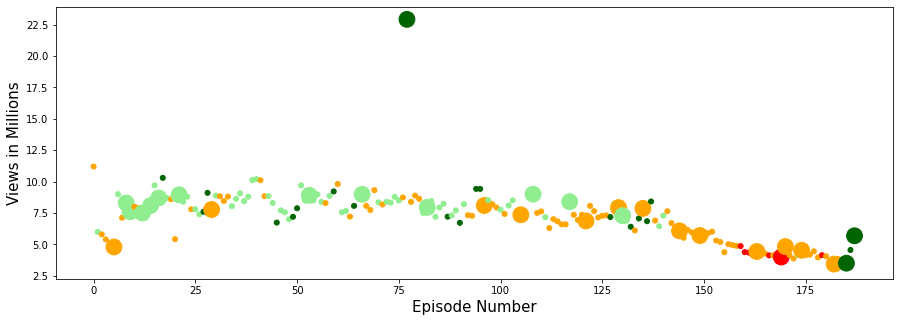

In [8]:
fig = plt.figure(figsize=(15,5))
plt.scatter(df.episode_number, df.viewership_mil, s = size, c = colour)
plt.xlabel('Episode Number', size = 15)
plt.ylabel('Views in Millions', size = 15)
plt.show()

In [9]:
max(df["viewership_mil"])

22.91

In [10]:
df.loc[df["viewership_mil"] == max(df["viewership_mil"])]

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,0.96875


In [11]:
data = df.loc[df["viewership_mil"] == max(df["viewership_mil"])]

In [12]:
data[['guest_stars']]

,guest_stars
77,"Cloris Leachman, Jack Black, Jessica Alba"


In [13]:
top_star = "Jack Black"